# Summary predictions for House & Weather measures

### This textbook contains the studies related to my Machine Learning project I had during my last year at ESME Sudria

## Summary

    I) Introduction / Presentation
    II) Get tha Data
    III) Exploratory Data Analysis
    IV) Data Preprocessing
    V) Machine Learning 
    VI) Conclusion


## I - Introduction

The purpose of this project is to display a summary of the weather conditions on a smartphone application in real time given the dataset available here https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information.
Our target is a dicrete variable that takes inicially 18 values, even thought this number likely to change.
So this is a classification problem, and our main goal is that every class is correctly identify, we want the lowest False Positive value as possible, so our metric will be the recall for each class.

Let's have a look at our dataset
Our dataset is a CSV file that contains the following features:
- Time: this is the index of our dataset, indeed all the values of each features are mesured in a span of 1 minute

Then we have all the features related to the Energy consumption / generation which are all in kW:

- use: total energy consumption
- gen: total energy generated by means of solar or other power generation resources
- House overall: overall house energy consumption
- Dishwasher: energy consumed by specific appliance
- Furnace 1: energy consumed by specific appliance
- Furnace 2: energy consumed by specific appliance
- Home office: energy consumed by specific appliance
- Firdge: energy consumed by specific appliance
- Wine cellar: energy consumed by specific appliance
- Garage door: energy consumed by specific appliance
- Kitchen 12: energy consumption in kitchen 1 
- Kitchen 14: energy consumption in Kitchen 2
- Kitchen 38: energy consumption in Kitchen 3
- Barn: energy consumed by specific appliance
- Well: energy consumed by specific appliance
- Microwave: energy consumed by specific appliance
- Living room: energy consumption in Living room
- Solar: solar power generation

And finally all the weather related features with their own unit of measurement:

- temperature: physical quantity used to tell if the air is cold or hot (the unit is not provided)
- humidity: concentration of water in the air (%)
- visibility: 
- apparentTemperature: temperature perceived by humans (the unit is not provided)
- pressure: atmospheric pressure (Pa)
- windSpeed: wind's speed (we will consider the unit is in mph)
- cloudCover: the percentage of the sky recovered by clouds (%)
- windBearing: the wind's direction (measured between 0° and 360°)
- dewPoint: atmospheric temperature (the unit is not provided)
- precipProbability: probability of precipitation (no unit)
- precipItensity: the amount of rain that falls over time (no unit provided but we can assume it's in inch per squared meter)

We also have two other features that are probably used by the data collection system, including our target:

- summary: general report of the weather, for example Clear, Mostly Cloudy, etc...
- icon: icon used by the data collection system 





## II - Get the Data

Donwload the CSV File from the link above, then creating a pandas dataframe to use the data.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Home.csv")
print(df.shape)
df.head()

(503911, 32)


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


We have a pretty large dataset with almost 500k rows and 32 features. During our work we will try to minimize the number of feature so our model performs better.

## III - Exploratory Data Analysis

This is a list of tasks we need to deal with:
    - checking the features types and missing values
    - make some descriptive statistics
    - work on the features

In [2]:
# check each feature's type

df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

As we can see we have only 4 features that are objects and that need to have their type changed:
Time, CloudCover, Icon and Summary.

It is obvious that Icon and summary have this type because of their categorical nature, however the cloudCover feature os suposed to be numerical, so we need to check this. 

Also the time is not a relevant feature in our case because of the nature of our classifcation problem.

On top of this, the feature use[kW] is the exact same as the House overall [kW] feature so we can remove it too.

In [3]:
# removing the time feature

df = df.drop(["time", "use [kW]"],axis = 1)
df.head()

,gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
### deleting the [kW] in the features name for simplicity

df.columns = [column.replace(' [kW]', '') for column in df.columns]
df.head()

,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
# checking the value of cloudCover

df["cloudCover"].value_counts()

0.0           63596
0.31          48101
1.0           47255
0.03          33186
0.04          23711
0.07          17995
0.08          17183
0.05          17146
0.06          13645
0.09          13491
0.1           12133
0.12          11385
0.11          11210
0.13          11096
0.02           9708
0.15           8968
0.16           8280
0.17           8001
0.14           7939
0.01           7767
0.19           7637
0.18           7542
0.21           7294
0.23           6791
0.2            6781
0.24           6760
0.22           6094
0.25           5294
0.26           5219
0.27           4829
              ...  
0.67            229
0.54            229
0.57            228
0.13            174
0.23            174
0.27            116
0.26            116
0.28            116
0.08            116
0.29            116
0.18            116
0.63            116
0.48            116
0.71            114
0.64            114
0.72            114
0.73            114
0.17             58
0.39             58


We can see that the cloudCover value is a type object because some rows have a value string. Given the number of rows in our dataset, it is a reasonable decision t o delete the concerned rows.
and then change the type of the feature.

In [6]:
df = df[df["cloudCover"] != "cloudCover"]
df.shape

(503853, 30)

In [7]:
df["cloudCover"] = df["cloudCover"].astype(float)
df.dtypes

gen                    float64
House overall          float64
Dishwasher             float64
Furnace 1              float64
Furnace 2              float64
Home office            float64
Fridge                 float64
Wine cellar            float64
Garage door            float64
Kitchen 12             float64
Kitchen 14             float64
Kitchen 38             float64
Barn                   float64
Well                   float64
Microwave              float64
Living room            float64
Solar                  float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover             float64
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: object

Now we should check the missing values

In [8]:
missing = df.isnull().sum()
missing

gen                    1
House overall          1
Dishwasher             1
Furnace 1              1
Furnace 2              1
Home office            1
Fridge                 1
Wine cellar            1
Garage door            1
Kitchen 12             1
Kitchen 14             1
Kitchen 38             1
Barn                   1
Well                   1
Microwave              1
Living room            1
Solar                  1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

It is likely that we have only one row that have missing values, let's check it and delete it.

In [9]:
df.tail()

,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(503910, axis = 0)
df.tail()

,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [11]:
missing = df.isnull().sum()
missing

gen                    0
House overall          0
Dishwasher             0
Furnace 1              0
Furnace 2              0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Kitchen 12             0
Kitchen 14             0
Kitchen 38             0
Barn                   0
Well                   0
Microwave              0
Living room            0
Solar                  0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

Now let's see if we can make changes to the number of features

In [12]:
### we want to reduce our number of features so we will average the energy consumption of each kitchen and Furnace 
### so we have 2 features instead of 5

df["Kitchen"] = df[["Kitchen 12", "Kitchen 14", "Kitchen 38"]].mean(axis = 1)
df["Furnace"] = df[["Furnace 1", "Furnace 2"]].mean(axis = 1)
df = df.drop(["Kitchen 12", "Kitchen 14", "Kitchen 38", "Furnace 1", "Furnace 2"], axis = 1)
print(df.shape)
df.head()

(503852, 27)


,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Kitchen,Furnace
58,0.003417,0.714200,0.000033,0.043067,0.005167,0.123317,0.013183,0.031750,0.001000,0.004233,...,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.000244,0.165533
59,0.003417,0.497067,0.000017,0.043283,0.005000,0.123283,0.012883,0.031783,0.001017,0.004233,...,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.000278,0.079925
60,0.003450,0.465133,0.000017,0.043250,0.005017,0.123350,0.012950,0.031800,0.001000,0.004233,...,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.000272,0.063567
61,0.003417,0.512933,0.000017,0.043300,0.004967,0.123867,0.012883,0.031817,0.001017,0.004233,...,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.000278,0.087608
62,0.003417,0.651283,0.000017,0.043283,0.114167,0.124267,0.012917,0.031800,0.001000,0.004233,...,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.000167,0.088892


Now let's deal with the categorical features of our dataset.

In [13]:
df['icon'].value_counts()

clear-night            194478
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: icon, dtype: int64

In [14]:
df['summary'].value_counts()

Clear                       376672
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: summary, dtype: int64

We can see here a typical problem when working on a classification problem, our target value is very unbalaced, having the  most represented class 'Clear' with almost 75% of the dataset. There are ways around this problem that we will try, but first we need to make these 2 features numerical so we can make analysis.

In [15]:
#creating the classes for the summary

weather_types_1 = ['Clear', 'Partly Cloudy', 'Light Rain', 'Drizzle', 'Overcast', 'Rain', 'Mostly Cloudy', 'Light Snow', 'Flurries',
         'Breezy', 'Snow', 'Breezy and Partly Cloudy', 'Foggy', 'Rain and Breezy', 'Heavy Snow', 'Flurries and Breezy', 'Breezy and Mostly Cloudy', 'Dry']
count = 1
for i in weather_types_1:
    df['summary'] = df['summary'].replace(i, count)
    count = count + 1


#creating the classes for the icon

weather_types_2 = ['clear-day', 'rain', 'partly-cloudy-day', 'partly-cloudy-night', 'snow', 'cloudy', 'wind', 'fog', 'clear-night']

count = 1
for i in weather_types_2:
    df['icon'] = df['icon'].replace(i, count)
    count += 1

Now these feature are numerical

In [16]:
df.dtypes

gen                    float64
House overall          float64
Dishwasher             float64
Home office            float64
Fridge                 float64
Wine cellar            float64
Garage door            float64
Barn                   float64
Well                   float64
Microwave              float64
Living room            float64
Solar                  float64
temperature            float64
icon                     int64
humidity               float64
visibility             float64
summary                  int64
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover             float64
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
Kitchen                float64
Furnace                float64
dtype: object

Now we can start to make some analysis, starting by the correlation of each faetures with our target.

In [17]:
import matplotlib.pyplot as plt
corr_matrix = df.corr()
corr_matrix["summary"].plot.bar(figsize = (15, 5))

given this correlation to our target, we can say that some features have a some good predictive power whereas some have less.
Which can be explained bu the nature of the features, indeed it is likely that the precipItensity has more impact on the summary than the energy consumed by a microwave.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE396FFC18>,
      dtype=object)

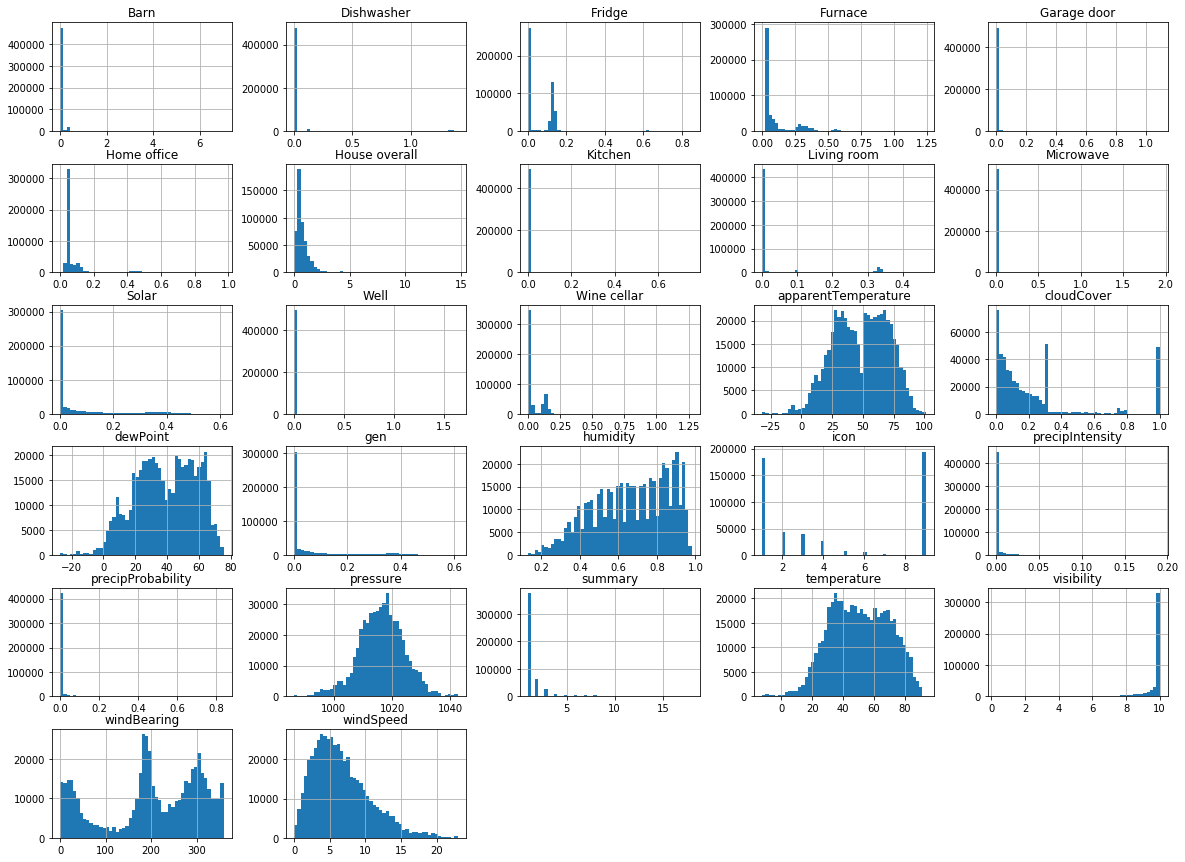

In [18]:
#looking at the distribution of each features
df.hist(bins=50, figsize = (20,  15))

As we can see we have a lot of outlied features such as the gen, visivility or precipItensity. The presence of outliers in the dataset can be a problem, but the fact that i don't personally know how the measure where done and if an outlier is a miss measurment or just a presence of variance in the dataset make me think that i should let them be here and treated as variance.
We also have some close to normal distributions with the temperature and the windSpeed features.

## IV - Data Preprocessing

In this part we will:
    - reduce the number of category in our target feature
    - encode the categorical features
    - make some feature scaling 

In [35]:
# reducing the number of category
# we will make the following groups
# 1) Clear, Dry
# 2) Partly Cloudy , Drizzle, Overcast, Mostly Cloudy, Breezy and Mostly Cloudy, Breezy and Partly Cloudy, Breezy
# 3) Flurries, Snow, Heavy Snow, Foggy, Light Snow, Flurries and Breezy
# 4) Light Rain, Rain, Rain and Breezy
weather_group_Clear = ['1', '18']
weather_group_Cloud = ['2', '4', '5', '7', '17', '12', '10']
weather_group_Snow = ['9', '11', '15', '13', '8', '16']
weather_group_Rain = ['3', '6', '14']

df['summary'] = df['summary'].replace(16, 3)
df['summary'].value_counts()

1    376730
2     85887
4     32711
3      8524
Name: summary, dtype: int64

our categorical feature is still unbalanced so will try it with another method, oversampling or undersampling

In [36]:
# splitting our dataset into our target and our features

features_ml = ['Home office', 'Dishwasher', 'Fridge', 'Furnace', 'Garage door',
                   'Barn', 'Kitchen', 'Living room', 'Microwave', 'Solar', 'Well', 'Wine cellar', 'gen', 'precipIntensity', 
                   'precipProbability', 'visibility', 'pressure', 'windBearing', 'windSpeed', 'humidity', 'House overall', 'cloudCover', 'temperature','dewPoint', 'apparentTemperature', 'icon']

X = df[features_ml]
y = df['summary']
print(df.shape)
print(X.shape)
print(y.shape)
X.head()

(503852, 27)
(503852, 26)
(503852,)


,Home office,Dishwasher,Fridge,Furnace,Garage door,Barn,Kitchen,Living room,Microwave,Solar,...,pressure,windBearing,windSpeed,humidity,House overall,cloudCover,temperature,dewPoint,apparentTemperature,icon
58,0.043067,0.000033,0.005167,0.165533,0.013183,0.031750,0.000244,0.001633,0.004233,0.003417,...,1016.25,285.0,8.29,0.61,0.714200,0.75,35.87,23.9,29.4,4
59,0.043283,0.000017,0.005000,0.079925,0.012883,0.031783,0.000278,0.001700,0.004233,0.003417,...,1016.25,285.0,8.29,0.61,0.497067,0.75,35.87,23.9,29.4,4
60,0.043250,0.000017,0.005017,0.063567,0.012950,0.031800,0.000272,0.001633,0.004233,0.003450,...,1016.25,285.0,8.29,0.61,0.465133,0.75,35.87,23.9,29.4,4
61,0.043300,0.000017,0.004967,0.087608,0.012883,0.031817,0.000278,0.001683,0.004233,0.003417,...,1016.25,285.0,8.29,0.61,0.512933,0.75,35.87,23.9,29.4,4
62,0.043283,0.000017,0.114167,0.088892,0.012917,0.031800,0.000167,0.001667,0.004233,0.003417,...,1016.25,285.0,8.29,0.61,0.651283,0.75,35.87,23.9,29.4,4


In [37]:
y.value_counts()

1    376730
2     85887
4     32711
3      8524
Name: summary, dtype: int64

In [38]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
feat_to_scale = ['pressure', 'windBearing', 'windSpeed', 'visibility', 'temperature', 'dewPoint', 'House overall', 'apparentTemperature']
scaler = MinMaxScaler()
X[feat_to_scale] = scaler.fit_transform(X[feat_to_scale].to_numpy())
X.describe()

,Home office,Dishwasher,Fridge,Furnace,Garage door,Barn,Kitchen,Living room,Microwave,Solar,...,pressure,windBearing,windSpeed,humidity,House overall,cloudCover,temperature,dewPoint,apparentTemperature,icon
count,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,...,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000,503852.000000
mean,0.081268,0.031371,0.063559,0.117985,0.014139,0.058532,0.003263,0.035317,0.010982,0.076238,...,0.533385,0.563643,0.290251,0.664090,0.058373,0.225885,0.595935,0.641834,0.603195,4.657907
std,0.104445,0.190962,0.076200,0.136938,0.014293,0.202718,0.026629,0.096061,0.098854,0.128433,...,0.140843,0.296722,0.173848,0.194399,0.071919,0.289907,0.179713,0.185812,0.165377,3.610260
min,0.000083,0.000000,0.000067,0.000150,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.040383,0.000000,0.005083,0.042650,0.012733,0.029833,0.000200,0.001483,0.003617,0.003367,...,0.443989,0.412256,0.159756,0.510000,0.024985,0.040000,0.455152,0.504624,0.474324,1.000000
50%,0.042217,0.000017,0.005433,0.044475,0.012933,0.031317,0.000250,0.001617,0.004000,0.004300,...,0.537460,0.579387,0.258839,0.680000,0.038213,0.120000,0.592046,0.645138,0.618694,3.000000
75%,0.068267,0.000233,0.125417,0.109700,0.013100,0.032883,0.000283,0.001750,0.004067,0.083933,...,0.625758,0.821727,0.390223,0.840000,0.065934,0.290000,0.741820,0.798501,0.738288,9.000000
max,0.971750,1.401767,0.851267,1.236317,1.088983,7.027900,0.755289,0.465217,1.929800,0.613883,...,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


#### Categorcal features encoder


In [39]:
### encoding the summary feature
from sklearn.preprocessing import OneHotEncoder

dummies = pd.get_dummies(X['icon'], prefix='icon', drop_first=False)
X = pd.concat([X, dummies], axis=1)
X = X.drop('icon', axis = 1)

X.head()

,Home office,Dishwasher,Fridge,Furnace,Garage door,Barn,Kitchen,Living room,Microwave,Solar,...,apparentTemperature,icon_1,icon_2,icon_3,icon_4,icon_5,icon_6,icon_7,icon_8,icon_9
58,0.043067,0.000033,0.005167,0.165533,0.013183,0.031750,0.000244,0.001633,0.004233,0.003417,...,0.461562,0,0,0,1,0,0,0,0,0
59,0.043283,0.000017,0.005000,0.079925,0.012883,0.031783,0.000278,0.001700,0.004233,0.003417,...,0.461562,0,0,0,1,0,0,0,0,0
60,0.043250,0.000017,0.005017,0.063567,0.012950,0.031800,0.000272,0.001633,0.004233,0.003450,...,0.461562,0,0,0,1,0,0,0,0,0
61,0.043300,0.000017,0.004967,0.087608,0.012883,0.031817,0.000278,0.001683,0.004233,0.003417,...,0.461562,0,0,0,1,0,0,0,0,0
62,0.043283,0.000017,0.114167,0.088892,0.012917,0.031800,0.000167,0.001667,0.004233,0.003417,...,0.461562,0,0,0,1,0,0,0,0,0


Before going into our machine learning models, we need to randomize the indexing of our dataset to prevent natural pattern creation, because this may cause our models not to work properly.

In [40]:
import numpy as np

X_model = X.reindex(np.random.permutation(X.index))
X_model

,Home office,Dishwasher,Fridge,Furnace,Garage door,Barn,Kitchen,Living room,Microwave,Solar,...,apparentTemperature,icon_1,icon_2,icon_3,icon_4,icon_5,icon_6,icon_7,icon_8,icon_9
471318,0.040333,0.000050,0.004967,0.565633,0.012700,0.031317,0.005750,0.331967,0.003100,0.001333,...,0.487237,0,1,0,0,0,0,0,0,0
55435,0.099700,0.000167,0.005233,0.303542,0.012533,0.030200,0.045256,0.098450,0.004017,0.020450,...,0.420871,0,0,0,0,0,0,0,0,1
442718,0.098700,0.000000,0.005083,0.042700,0.013017,0.029867,0.000261,0.001433,0.002950,0.018450,...,0.591216,0,0,0,0,0,0,0,0,1
74002,0.039917,0.000017,0.004983,0.144658,0.012817,0.030283,0.000261,0.001333,0.003933,0.279683,...,0.371021,0,0,0,0,0,0,0,0,1
295701,0.039050,0.000267,0.123767,0.043442,0.012683,0.028267,0.000200,0.001367,0.003917,0.205150,...,0.767943,0,1,0,0,0,0,0,0,0
100616,0.041983,0.000000,0.122933,0.049375,0.013000,0.032967,0.000144,0.001517,0.004183,0.003367,...,0.545345,0,0,0,0,0,0,0,0,1
377200,0.042683,0.000000,0.005150,0.043167,0.012983,0.032083,0.000261,0.001550,0.003133,0.004383,...,0.659084,1,0,0,0,0,0,0,0,0
374326,0.041600,0.000267,0.005150,0.043100,0.013233,0.032600,0.000267,0.001633,0.003200,0.004400,...,0.684985,0,1,0,0,0,0,0,0,0
179809,0.458117,0.000000,0.138283,0.049208,0.012933,0.032817,0.000189,0.100633,0.004000,0.003033,...,0.536261,0,0,0,0,0,0,0,0,1
254885,0.041300,0.000000,0.146017,0.044008,0.013133,0.031800,0.000206,0.001600,0.004150,0.003483,...,0.728153,0,1,0,0,0,0,0,0,0


In [41]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_model, y)
print(sorted(Counter(y_resampled).items()))


[(1, 376730), (2, 376730), (3, 376730), (4, 376730)]


## V -  Machine Learning

We wil start with a very powerfull model to have some insights on how it behave.

Let's start by splitting our dataframe.

In [42]:
### splitting the data 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1356228, 34)
(1356228,)
(150692, 34)
(150692,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, roc_curve, precision_score, recall_score, confusion_matrix

rf = RandomForestClassifier() 
rf_score = cross_val_score(rf, X_train, y_train, cv=5, verbose=5)
print('Score on Validation Set : {}'.format(rf_score.mean()))

In [82]:
# accuracy on test set
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78     37823
           2       0.80      0.79      0.79     37805
           3       0.94      0.97      0.96     37420
           4       0.90      0.87      0.89     37644

    accuracy                           0.85    150692
   macro avg       0.85      0.85      0.85    150692
weighted avg       0.85      0.85      0.85    150692



In [76]:
### Optimizing the hyperparameters of the Random Forest

param_to_opti = {
    'n_estimators' : [11, 26],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 8],
    'max_features' : ['auto', 'log2'],
}

rf_opti = RandomForestClassifier()
rf_opti_model = GridSearchCV(estimator=rf_opti, scoring='f1_macro', param_grid=param_to_opti, cv=5)
rf_opti_model.fit(X_train, y_train)
print('Random Forest best hyperparameters : {}'.format(rf_opti_model.best_params_))

Random Forest best hyperparameters : {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 11}


In [79]:
### Accuracy on validation set (i.e Cross-Validation on training set), 5-fold Cross-Validation

rf_2 = RandomForestClassifier(n_estimators=11, criterion='gini', max_depth=8, max_features='auto', random_state=42, n_jobs = -1)
rf_score_2 = cross_val_score(rf_2, X_train, y_train, cv=5, verbose=5)
print('Score on Validation Set : {}'.format(rf_score_2.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.390, total=  18.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.1s remaining:    0.0s


[CV] .................................... , score=0.388, total=  16.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.4s remaining:    0.0s


[CV] .................................... , score=0.385, total=  16.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   51.9s remaining:    0.0s


[CV] .................................... , score=0.387, total=  17.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] .................................... , score=0.390, total=  16.5s
Score on Validation Set : 0.38795394387725596


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


In [81]:
# accuracy on test set
rf_2.fit(X_train, y_train)
rf_predictions = rf_2.predict(X_test)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           1       0.36      0.69      0.47     37823
           2       0.35      0.09      0.14     37805
           3       0.41      0.67      0.51     37420
           4       0.39      0.09      0.15     37644

    accuracy                           0.38    150692
   macro avg       0.38      0.38      0.32    150692
weighted avg       0.38      0.38      0.32    150692

